# Image Augmentation for Air Jordan

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import tensorflow as tf
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2

DATA_DIR = os.path.join(os.environ["HOME"], "Datasets","H2O","AirJordan")
FAKE_DIR = os.path.join(DATA_DIR, "FAKE")
REAL_DIR = os.path.join(DATA_DIR, "REAL")

2023-02-14 13:45:18.707680: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# List of Images

In [2]:
FAKE_IMG_PATHS = glob(os.path.join(FAKE_DIR, "*.png"))
FAKE_IMG_PATHS[:3]

['/Users/jonghang/Datasets/H2O/AirJordan/FAKE/striz_조던윙_13.png',
 '/Users/jonghang/Datasets/H2O/AirJordan/FAKE/god_조던윙_26.png',
 '/Users/jonghang/Datasets/H2O/AirJordan/FAKE/batch_20221215_105450.png']

In [3]:
REAL_IMG_PATHS = glob(os.path.join(REAL_DIR, "*.png"))
REAL_IMG_PATHS[:3]

['/Users/jonghang/Datasets/H2O/AirJordan/REAL/Jordan1_Wing_Logo_67.png',
 '/Users/jonghang/Datasets/H2O/AirJordan/REAL/조던윙-675.png',
 '/Users/jonghang/Datasets/H2O/AirJordan/REAL/Jordan1_Wing_Logo_137.png']

# Augmentation Functions
## Random Flips

In [4]:
def random_flip(image_path):
    """
    Randomly flips the image-label pair along the 1-dimension with probability 0.5.
    
    Arguments:
    image - tf.Tensor with shape [width, height, 3] representing the camera RGB image
    
    Returns:
    image -- Augmented tf.Tensor with shape [width, height, 3] representing the camera RGB image
    """
    # read image file
    image = cv2.imread(image_path)
    # creates a random float between 0 and 1
    random = tf.random.uniform(shape=[],minval=0, maxval=1, dtype=tf.float16)
    
    image = tf.cond(pred=tf.greater(random, 0.5),
                    true_fn=lambda: (tf.image.flip_left_right(image)),
                    false_fn=lambda: image)
    return image

Test `random_flip`

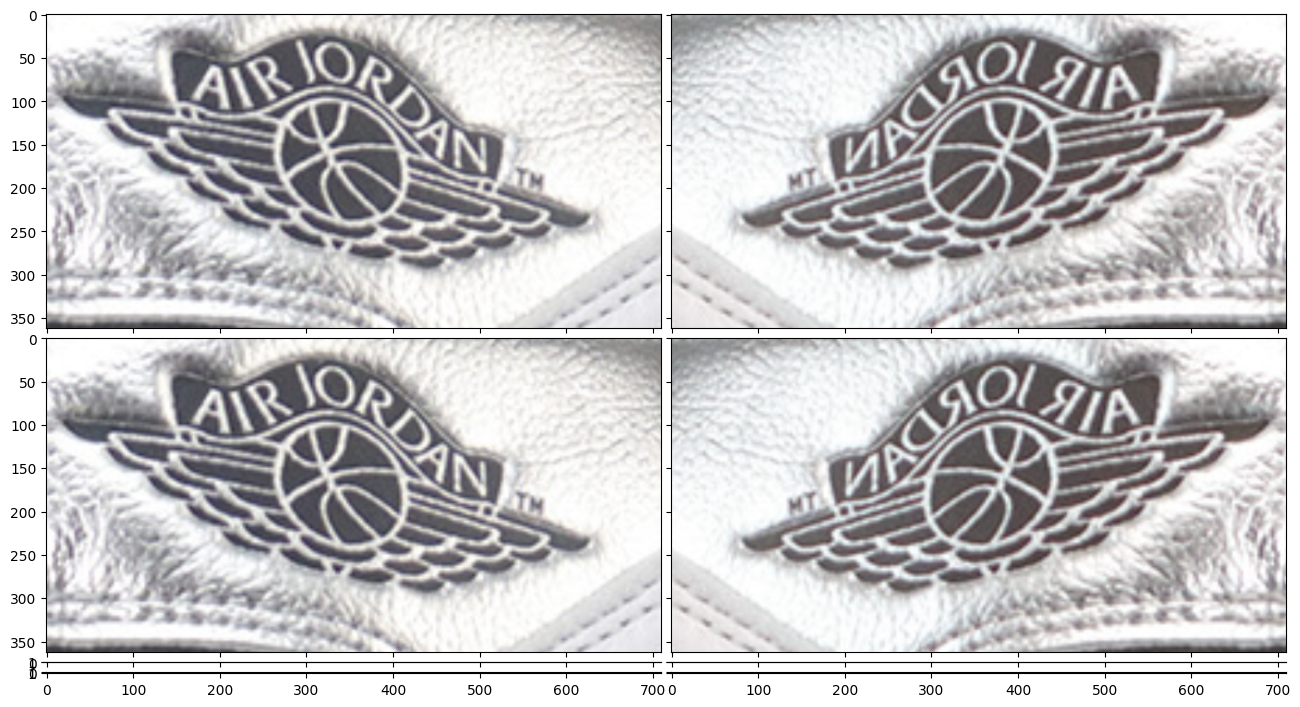

In [5]:
image_path = FAKE_IMG_PATHS[0]

fig = plt.figure(figsize=(16, 16))

grid = ImageGrid(fig, 111,
                 nrows_ncols=(4, 2),
                 axes_pad=0.1,
                 )

for i in range(0, 4, 2):
    image_orig = plt.imread(image_path)
    image_augmented = random_flip(image_path)
    grid[i].imshow(image_orig)
    grid[i+1].imshow(image_augmented)

## Random Gamma

In [6]:
def random_gamma(image_path):
    """
    Randomly applies gamma augmentation to the image
    
    Arguments:
    image - tf.Tensor with shape [width, height, 3] representing the camera RGB image
    
    Returns:
    image - Augmented tf.Tensor with shape [width, height, 3] representing the camera RGB image
    """
    # read image file
    image = cv2.imread(image_path)
    # augment image
    random_gamma = tf.random.uniform(shape=[],
                                     minval=0.3, 
                                     maxval=1.2, 
                                     dtype=tf.float32)
    image_aug = tf.image.adjust_gamma(image, gamma=random_gamma)
    return image_aug

**IMAGE QC**

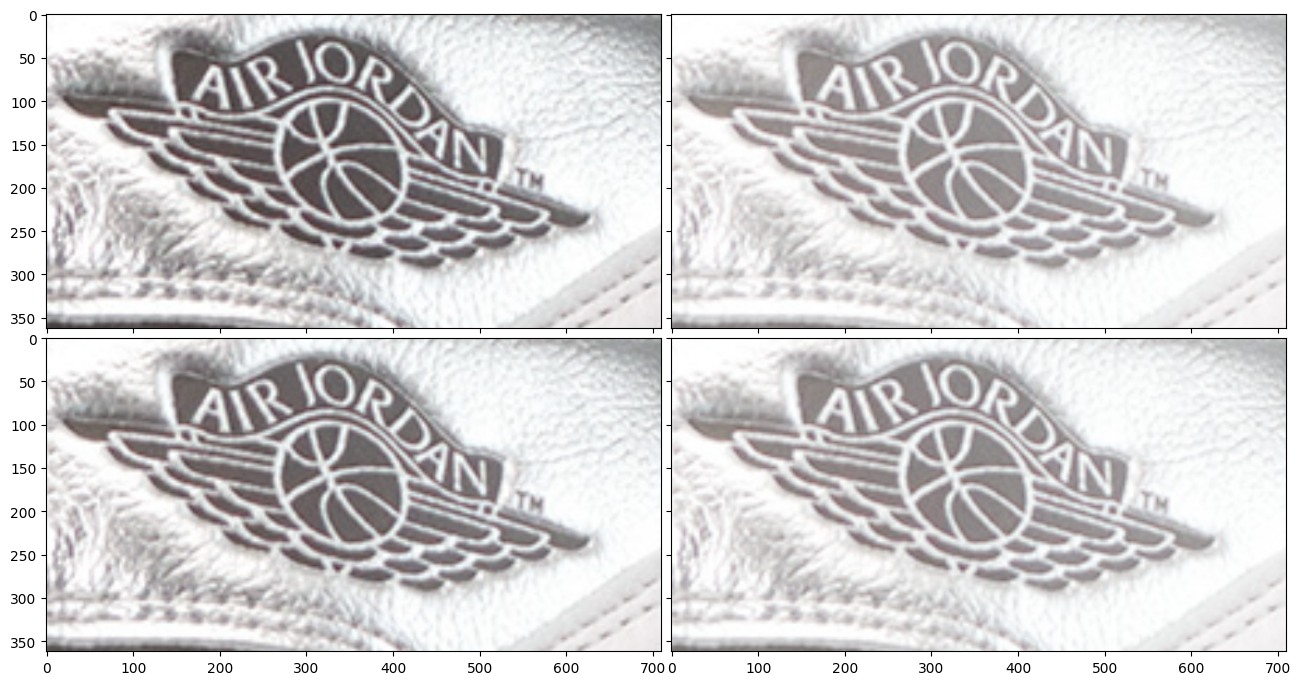

In [7]:
image_path = FAKE_IMG_PATHS[0]
fig = plt.figure(figsize=(16, 16))

grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 2),
                 axes_pad=0.1,
                 )

for ax in grid:
    image_augmented = random_gamma(image_path)
    ax.imshow(image_augmented)

# Random Brightness

In [8]:
def random_brightness(image_path):
    """
    Randomly applies brightness augmentation to the image
    
    Arguments:
    image -- tf.Tensor with shape [width, height, 3] 
             representing the camera RGB image
    
    Returns:
    image -- Augmented tf.Tensor with shape [width, height, 3] 
             representing the camera RGB image
    """
    # read image file
    image = cv2.imread(image_path)
    # augment image
    image_aug = tf.image.random_brightness(image, max_delta=0.4)
    return image_aug

**IMAGE QC**

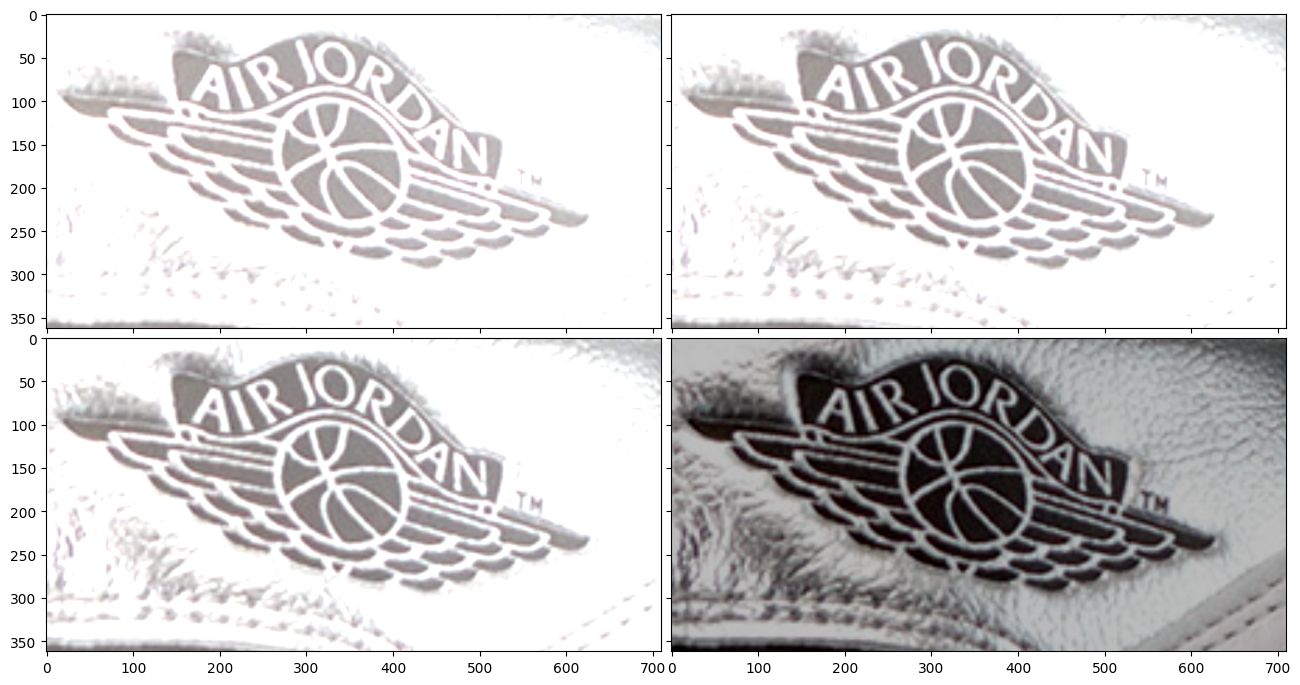

In [9]:
fig = plt.figure(figsize=(16, 16))

grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 2),
                 axes_pad=0.1,
                 )

for ax in grid:
    image_augmented = random_brightness(FAKE_IMG_PATHS[0])
    ax.imshow(image_augmented)

## Random Contrast

In [10]:
def random_contrast(image_path):
    """
    Randomly applies contrast augmentation to the image
    
    Arguments:
    image -- tf.Tensor with shape [width, height, 3] 
             representing the camera RGB image
    
    Returns:
    image -- Augmented tf.Tensor with shape [width, height, 3] 
             representing the camera RGB image
    """
    # read image file
    image = plt.imread(image_path)
    # augment image
    image_aug = tf.image.random_contrast(image, lower=0.2, upper=1.1)
    return image_aug

**IMAGE QC**

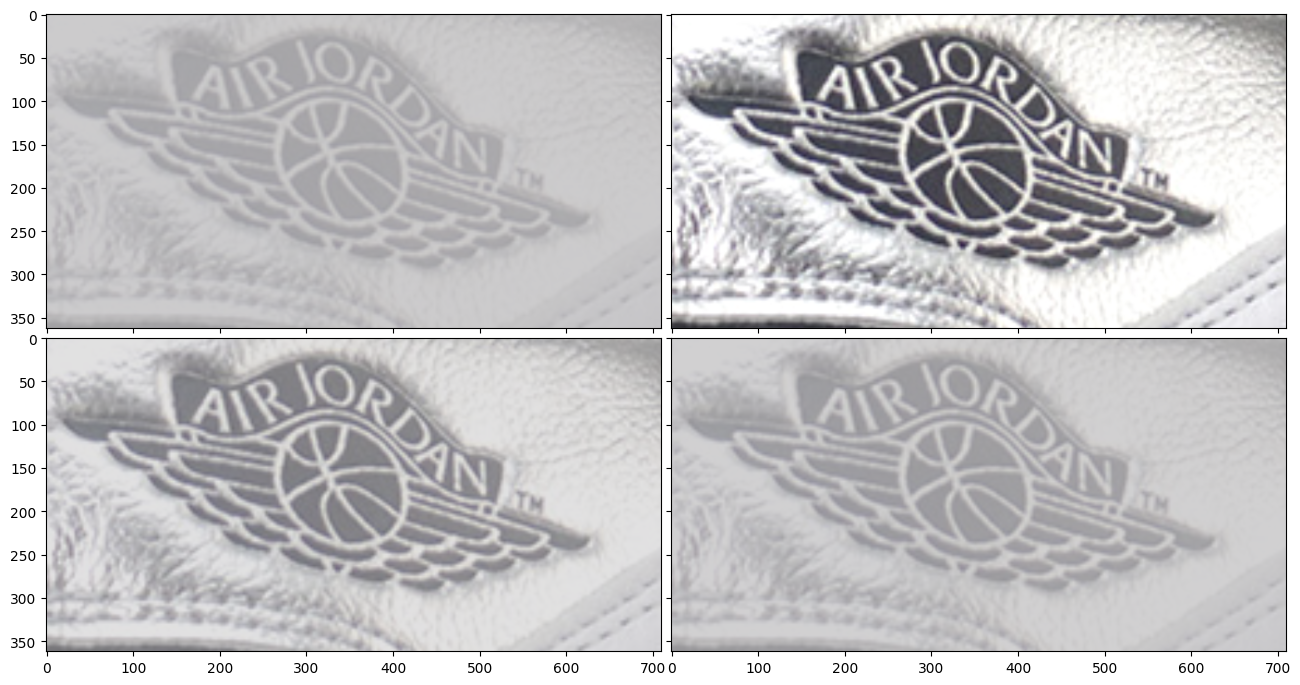

In [11]:
fig = plt.figure(figsize=(16, 16))

grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 2),
                 axes_pad=0.1,
                 )

for ax in grid:
    image_augmented = random_contrast(FAKE_IMG_PATHS[0])
    ax.imshow(image_augmented)

## Random Noise

In [12]:
def random_noise(image_path):
    """
    Randomly applies contrast augmentation to the image
    
    Arguments:
    image -- tf.Tensor with shape [width, height, 3] 
             representing the camera RGB image
    
    Returns:
    image -- Augmented tf.Tensor with shape [width, height, 3] 
             representing the camera RGB image
    """
    # read image file
    # image = plt.imread(image_path)
    image = cv2.imread(image_path)
    
    # Create a random standart deviation - simulates the intensity of the noise
    random_stddev = tf.random.uniform(shape=[], minval=2, maxval=30, dtype=tf.float32)
    
    # Create a noise tensor with a shape like the input image. Use zero-mean and a random std
    noise = tf.random.normal(tf.shape(image), 
                             mean=0.0, 
                             stddev=random_stddev, 
                             dtype=tf.float32)
    
    # Add the noise to the image. Cast the image to tf.float32 before the addition
    image = tf.cast(image, dtype = tf.float32) + noise
    
    # Clip the values of the image to [0, 255] 
    image = tf.clip_by_value(image, clip_value_min=0, clip_value_max=255)
    
    # Cast the image back to tf.uint8
    image = tf.cast(image, dtype = tf.uint8)
    
    return image

**IMAGE QC**

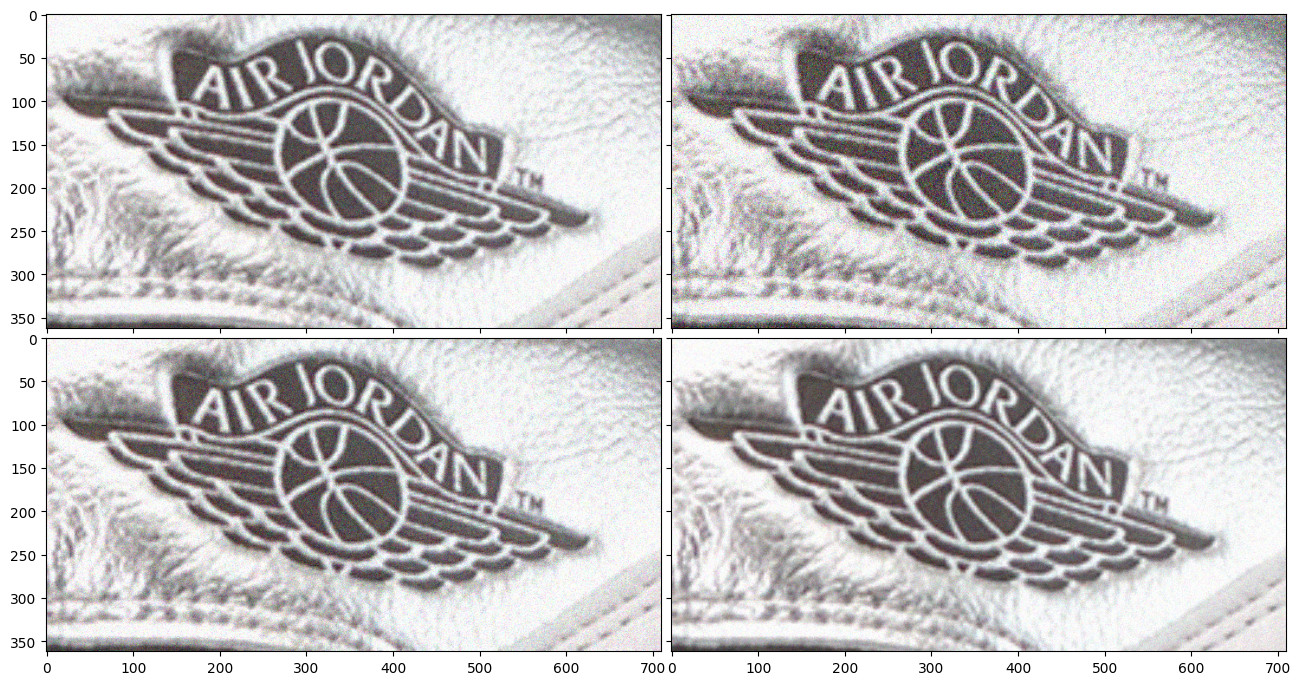

In [13]:
fig = plt.figure(figsize=(16, 16))

grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 2),
                 axes_pad=0.1,
                 )

for ax in grid:
    image_augmented = random_noise(FAKE_IMG_PATHS[0])
    ax.imshow(image_augmented)

## Random Zoom

In [14]:
def random_zoom(image_path):
    """
    Randomly applies random zoom augmentation to the image-label pair. Randomly resizes the image 
    and then crops it back to original size.
    
    Arguments:
    image - tf.Tensor with shape [width, height, 3] representing the camera RGB image
    
    Returns:
    image - Augmented tf.Tensor with shape [width, height, 3] representing the camera RGB image
    """
    # read image file
    image = cv2.imread(image_path)
    
    # Store the original height, width of the input image
    original_shape = tf.shape(image)[:2]
    
    # Create a random scale between 1 und 2.5
    scale = tf.random.uniform(shape=[], minval=1, maxval=2.5, dtype=tf.float32)
    
    # Calculate the new dimension after scaling the the original image with scale
    new_dim = tf.cast(tf.cast([image.shape[0], image.shape[1]], tf.float32)*scale, tf.int32)
    
    # Resize the image to the new dimension  
    image = tf.image.resize(image, new_dim, method=tf.image.ResizeMethod.BILINEAR)
    
    # Resize returns tf.float32 for BILINEAR, convert back to tf.uint8
    image = tf.cast(image, tf.uint8)  
    
    # Calculate the positions boundaries of the top left corner of the new crop
    min_top_left = tf.constant([0, 0], dtype=tf.int32)
    max_top_left = new_dim - original_shape
    
    # Generate a random position of the new crop
    x_top_left, y_top_left = min_top_left[1], min_top_left[0]
    if min_top_left[1] < max_top_left[1]:
        x_top_left = tf.random.uniform(shape=[], minval=min_top_left[1], 
                                       maxval=max_top_left[1], dtype=tf.int32)
    if min_top_left[0] < max_top_left[0]:
        y_top_left = tf.random.uniform(shape=[], minval=min_top_left[0], 
                                       maxval=max_top_left[0], dtype=tf.int32)
    
    # Crop the original image using the original shape and the new random position
    image = tf.image.crop_to_bounding_box(
        image=image,
        offset_height=y_top_left,
        offset_width=x_top_left,
        target_height=original_shape[0],
        target_width=original_shape[1]
    )
   
    return image

**IMAGE QC**

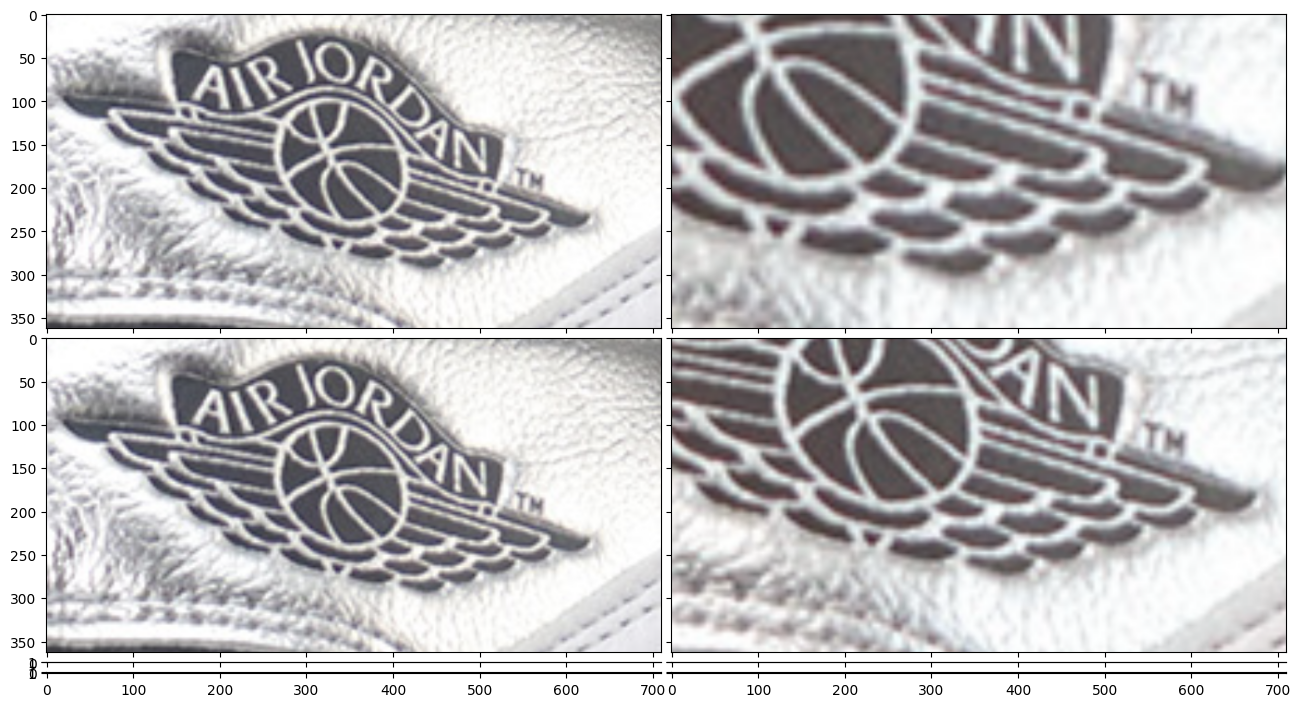

In [15]:
image_path = FAKE_IMG_PATHS[0]
image_orig = plt.imread(image_path)

fig = plt.figure(figsize=(16, 16))

grid = ImageGrid(fig, 111,
                 nrows_ncols=(4, 2),
                 axes_pad=0.1,
                 )

for i in range(0, 4, 2):
    image_augmented = random_zoom(image_path)
    grid[i].imshow(image_orig)
    grid[i+1].imshow(image_augmented)

# Implement Augmentation

In [16]:
def implement_augmentation(image_path, dest_dir):
    """
    Read an image file and apply augmentations
    After that save each augmented image with a new name by
    concatenating the base name with suffix representing the augmentation
    """
    # apply random_flip
    aug_random_flip = np.array(random_flip(image_path))
    # apply random gamma
    aug_random_gamma = np.array(random_gamma(image_path))
    # apply random brightness
    aug_random_brightness = np.array(random_brightness(image_path))
    # random constrast
    aug_random_constrast = np.array(random_contrast(image_path))
    # random noise
    aug_random_noise = np.array(random_noise(image_path))
    # random zoom
    aug_random_zoom = np.array(random_zoom(image_path))
    
    # save the augmented images
    base_filename = os.path.basename(image_path)[:-4]
    # random flip
    cv2.imwrite(os.path.join(dest_dir, base_filename + "_random_flip.png"), aug_random_flip)
    # random gamma
    cv2.imwrite(os.path.join(dest_dir, base_filename + "_random_gamma.png"), aug_random_gamma)
    # random brightness
    cv2.imwrite(os.path.join(dest_dir, base_filename + "_random_brightness.png"), aug_random_brightness)
    # random contrast
    # cv2.imwrite(os.path.join(dest_dir, base_filename + "_random_contrast.png"), aug_random_constrast)
    # random noise
    cv2.imwrite(os.path.join(dest_dir, base_filename + "_random_noise.png"), aug_random_noise)
    # random zoom
    cv2.imwrite(os.path.join(dest_dir, base_filename + "_random_zoom.png"), aug_random_zoom)

# Augment Fake Images and Save

In [19]:
[implement_augmentation(x, FAKE_DIR) for x in FAKE_IMG_PATHS];

In [21]:
[implement_augmentation(x, REAL_DIR) for x in REAL_IMG_PATHS];